<a href="https://colab.research.google.com/github/ORCT/ds-section2-project/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install category_encoders

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.linear_model import RidgeCV, LassoCV
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv('main_df_fin.csv')
df

,Match_Id,Track,Name,Rank,Time,Kart,드리프트,가속력,코너링,부스터시간,부스터충전량
0,Color맥라렌/1,차이나 라사,Color맥라렌,1.0,110.03,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
1,Color맥라렌/1,차이나 라사,KR퀵서비스,2.0,110.04,프로토 바이크 V1,940.0,1000.0,885.0,780.0,880.0
2,Color맥라렌/1,차이나 라사,하이럼스미스,3.0,110.66,나이트 세이버 V1,1050.0,1024.0,965.0,950.0,600.0
3,Color맥라렌/2,네모 장난감 선물공장,Color맥라렌,1.0,110.03,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
4,Color맥라렌/2,네모 장난감 선물공장,KR퀵서비스,2.0,110.04,프로토 바이크 V1,940.0,1000.0,885.0,780.0,880.0
...,...,...,...,...,...,...,...,...,...,...,...
9047,까이브/99,월드 이탈리아 피사의 사탑,l지존지후l,4.0,69.49,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
9048,까이브/100,월드 두바이 다운타운,YJWP,1.0,67.20,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
9049,까이브/100,월드 두바이 다운타운,뱩소현,2.0,67.25,스펙터 V1,1105.0,1105.0,1040.0,1005.0,490.0
9050,까이브/100,월드 두바이 다운타운,까이브,3.0,69.02,렉키 V1,1020.0,1020.0,965.0,780.0,880.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9052 entries, 0 to 9051
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Match_Id  9052 non-null   object 
 1   Track     9052 non-null   object 
 2   Name      9052 non-null   object 
 3   Rank      9052 non-null   float64
 4   Time      9052 non-null   float64
 5   Kart      9052 non-null   object 
 6   드리프트      9052 non-null   float64
 7   가속력       9052 non-null   float64
 8   코너링       9052 non-null   float64
 9   부스터시간     9052 non-null   float64
 10  부스터충전량    9052 non-null   float64
dtypes: float64(7), object(4)
memory usage: 778.0+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()[df.isna().sum() !=0]/len(df)

Series([], dtype: float64)

In [7]:
df.nunique()

Match_Id    2784
Track         99
Name          80
Rank           4
Time          89
Kart          15
드리프트           8
가속력            5
코너링           10
부스터시간          7
부스터충전량        11
dtype: int64

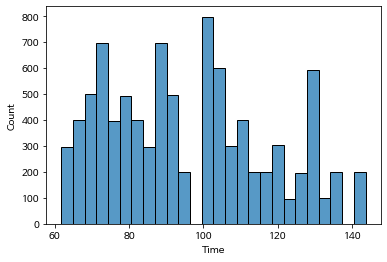

In [8]:
sns.histplot(df.Time)

In [9]:
df.corr()['Time'].sort_values(ascending=False)

Time      1.000000
Rank      0.132766
부스터시간     0.054923
가속력      -0.055326
드리프트     -0.093682
부스터충전량   -0.098321
코너링      -0.161547
Name: Time, dtype: float64

In [10]:
df.drop(['Match_Id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9052 entries, 0 to 9051
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Track   9052 non-null   object 
 1   Name    9052 non-null   object 
 2   Rank    9052 non-null   float64
 3   Time    9052 non-null   float64
 4   Kart    9052 non-null   object 
 5   드리프트    9052 non-null   float64
 6   가속력     9052 non-null   float64
 7   코너링     9052 non-null   float64
 8   부스터시간   9052 non-null   float64
 9   부스터충전량  9052 non-null   float64
dtypes: float64(7), object(3)
memory usage: 707.3+ KB


In [11]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

def xy_split(df):
  target = 'Time'
  X = df.drop(target, axis=1)
  y = df[target]
  return X, y

X_train, y_train = xy_split(train)
X_test, y_test = xy_split(test)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7241, 9), (1811, 9), (7241,), (1811,))

굳이 정규화 모델이 필요한가... 일단 해보자

In [13]:
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [14]:
X_train[numeric_feats].describe().T[['mean', 'std']]

,mean,std
Rank,-4.906385e-17,1.000069
드리프트,9.515935e-16,1.000069
가속력,1.923303e-16,1.000069
코너링,-1.166738e-15,1.000069
부스터시간,-4.847509e-16,1.000069
부스터충전량,-4.219491e-17,1.000069


In [15]:
ohe = OneHotEncoder(use_cat_names=True)

X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

In [16]:
(X_train_ohe.dtypes == 'object').sum()

0

In [17]:
X_train_ohe

,Track_빌리지 운명의 다리,Track_월드 뉴욕 대질주,Track_비치 해변 드라이브,Track_차이나 라사,Track_빌리지 남산,Track_코리아 제주 해오름 다운힐,Track_차이나 황산,Track_WKC 투어링 랠리,Track_쥐라기 공룡 결투장,Track_브로디 비밀의 연구소,...,Kart_프로토 바이크 V1,Kart_비트 V1,Kart_태극 V1,Kart_이온 V1,Kart_폭스 V1,드리프트,가속력,코너링,부스터시간,부스터충전량
5138,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.495547,-0.585229,-0.123800,-1.181280,1.113469
9027,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.495547,-0.585229,-0.123800,-1.181280,1.113469
3886,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.248107,-0.477467,-0.123800,0.642617,-0.552388
6362,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,-0.495547,-0.585229,-0.123800,-1.181280,1.113469
3437,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,-0.495547,-0.585229,-0.123800,-1.181280,1.113469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.495547,-0.585229,-0.123800,-1.181280,1.113469
5191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.495547,-0.585229,-0.123800,-1.181280,1.113469
5390,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.248107,-0.477467,-0.123800,0.642617,-0.552388
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.495547,-0.585229,-0.123800,-1.181280,1.113469


In [18]:
baseline = [y_train.mean()] * len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 18.48106731411252


In [19]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3)
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, val_score, test_score

In [20]:
from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장합니다. 
ols = LinearRegression()

# 모델 학습
ols.fit(X_train_ohe, y_train)

# 성능 비교
ols_train, ols_val, ols_test = print_score(ols,X_train_ohe, y_train, X_test_ohe, y_test)

학습 세트 r2_score : 0.993
검증 세트 r2_score : -1.5793527493142715e+18
테스트 세트 r2_score : -2.323799779031346e+16


In [21]:
ols_coef = pd.Series(ols.coef_, X_train_ohe.columns)
ols_coef.sort_values(ascending=False).head(20)

코너링                         6.342628e+11
Kart_플라즈마 V1                5.301653e+11
Kart_프로토 바이크 V1             5.046248e+11
Kart_렉키 V1                  4.293267e+11
Kart_그믐 산군 V1               3.754831e+11
Kart_어벤저 V1                 1.649720e+11
Name_lSAVEl동현               8.139848e+10
Name_YellowBazzii           7.181594e+10
Kart_아이언 솔리드 V1             6.867274e+10
부스터시간                       5.428057e+10
Kart_이온 V1                  4.149296e+10
Kart_태극 V1                  2.388472e+10
Kart_비트 V1                  1.085136e+10
Track_빌리지 붐힐터널              3.658879e+07
Track_트랙 9                  3.658879e+07
Track_신화 차원의 관문             3.658879e+07
Track_[Reverse] 아이스 펭귄타운    3.658879e+07
Track_공동묘지 마왕의 초대           3.658879e+07
Track_팩토리 두 개의 공장           3.658879e+07
Track_네모 강철바위 용광로           3.658879e+07
dtype: float64

In [22]:
from sklearn.feature_selection import f_regression, SelectKBest

# selector를 정의합니다. 
# 총 282개 특성 중 50개만 사용하도록 하겠습니다. 

selector = SelectKBest(score_func= f_regression, k=50)

# 학습 데이터에 fit_transform
X_train_selected = selector.fit_transform(X_train_ohe, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test_ohe)

In [23]:
selector.get_feature_names_out()

array(['Name_YJWP', 'Name_l지존지후l', 'Name_Fairy아들', 'Name_Fairy레오',
       'Name_까이브', 'Name_조선왕죠실룍', 'Name_playercoco', 'Name_티코풀악셀',
       'Name_바닐라밀크티', 'Name_리쿠하치아루', 'Name_비염앓는사람', 'Name_574335735623',
       'Name_sofjoie', 'Name_별의조갘', 'Name_뱩소현', 'Name_dwko',
       'Name_LeMans람지', 'Name_초록맥주나무', 'Name_Willow충신', 'Name_누군지1',
       'Name_티이라최고야', 'Name_EBFD', 'Name_솔의눈맛치킨', 'Name_관속에다이빙',
       'Name_nojs22', 'Name_RedSunDISH', 'Name_SISAnnaBella',
       'Name_하늘나라올라', 'Name_회천면사무소', 'Name_피눈물메이커', 'Name_Mudo094',
       'Name_덩덩치킨', 'Name_침착혜혜', 'Name_쿠앤크맛치킨', 'Name_알루미늄기사',
       'Name_LSBchampions', 'Name_디엘미누', 'Name_sehbg', 'Name_Cartoon25',
       'Name_BabyHuaZhi', 'Rank', 'Kart_렉키 V1', 'Kart_나이트 세이버 V1',
       'Kart_어벤저 V1', 'Kart_크롬 버스트 V1', 'Kart_스펙터 V1', 'Kart_폭스 V1',
       '드리프트', '코너링', '부스터충전량'], dtype=object)

In [24]:
# 다중선형회귀의 회귀계수 크기가 큰 상위 50개와 selectkbest로 선택된 50개를 비교해봤을 때 총 3개의 특성이 겹칩니다.
intersection_coef = set(ols_coef.head(50).index) & set(selector.get_feature_names_out())
print(len(intersection_coef))
print(intersection_coef)

# 타겟값과 상관계수가 가장 큰 50개의 컬럼과 비교했을 때는 36개가 겹칩니다. 
# 특성들과 타겟간의 상관관계룰 구하는 방법이 다르기 때문에 결과가 다르게 나옵니다.
tmp = pd.concat([X_train_ohe, y_train], axis=1).corr()['Time'].sort_values(ascending=False)[1:51]
intersection_corr = set(tmp.index) & set(selector.get_feature_names_out())
print(len(intersection_corr))
print(intersection_corr)

0
set()
25
{'Name_SISAnnaBella', 'Name_솔의눈맛치킨', 'Name_LeMans람지', 'Name_초록맥주나무', 'Name_Cartoon25', 'Name_침착혜혜', 'Name_Fairy레오', 'Name_playercoco', 'Name_BabyHuaZhi', 'Kart_크롬 버스트 V1', 'Name_하늘나라올라', 'Name_Mudo094', 'Rank', 'Name_Fairy아들', 'Name_티코풀악셀', 'Name_sehbg', 'Kart_나이트 세이버 V1', 'Name_티이라최고야', 'Name_sofjoie', 'Name_리쿠하치아루', 'Name_디엘미누', 'Name_비염앓는사람', 'Name_EBFD', 'Name_dwko', 'Kart_폭스 V1'}


In [25]:
# 50개의 특성으로 다중선형회귀 모델을 만들어보겠습니다.
ols_fs = LinearRegression()
ols_fs.fit(X_train_selected, y_train)

# 성능 비교
ols_fs_train, ols_fs_val, ols_fs_test = print_score(ols_fs, X_train_selected, y_train, X_test_selected, y_test)

학습 세트 r2_score : 0.895
검증 세트 r2_score : 0.894
테스트 세트 r2_score : 0.879


In [26]:
ols_fs_coef = pd.Series(ols_fs.coef_, selector.get_feature_names_out())
ols_fs_coef.sort_values(ascending=False)

Name_playercoco      50.195826
Name_EBFD            48.251013
Name_sehbg           46.539041
Name_Cartoon25       41.693858
Name_디엘미누            40.620642
Name_BabyHuaZhi      39.603051
Name_LeMans람지        36.615285
Name_SISAnnaBella    36.378234
Name_Mudo094         35.035285
Name_비염앓는사람          30.301967
Name_티코풀악셀           27.356355
Name_sofjoie         26.575826
Name_침착혜혜            25.542669
Name_티이라최고야          25.262812
Name_Fairy레오         24.992979
Name_초록맥주나무          21.276107
Kart_스펙터 V1          20.460240
Name_리쿠하치아루          19.980642
Name_하늘나라올라          18.404850
Name_솔의눈맛치킨          17.674799
Name_dwko            17.228515
Name_Fairy아들         14.630428
Kart_렉키 V1           14.308639
Kart_어벤저 V1          13.290884
Kart_나이트 세이버 V1       9.905094
Kart_폭스 V1            5.191277
드리프트                  2.103491
Kart_크롬 버스트 V1        1.854811
Rank                 -0.860465
Name_LSBchampions    -4.471729
부스터충전량               -5.278025
코너링                 -10.129982
Name_574

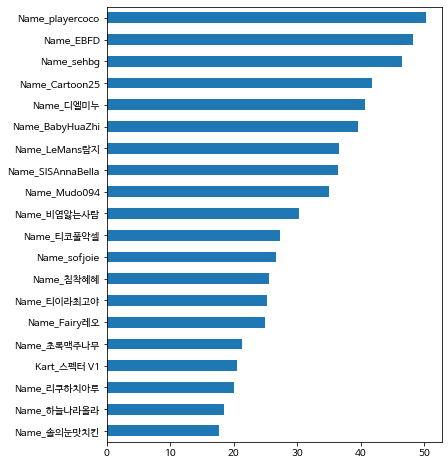

In [27]:
ols_fs_coef.sort_values().tail(20).plot.barh(figsize=(6, 8))
plt.show()

Ridge Regression, alpha=0.01
학습 세트 r2_score : 0.993
검증 세트 r2_score : 0.992
테스트 세트 r2_score : 0.991


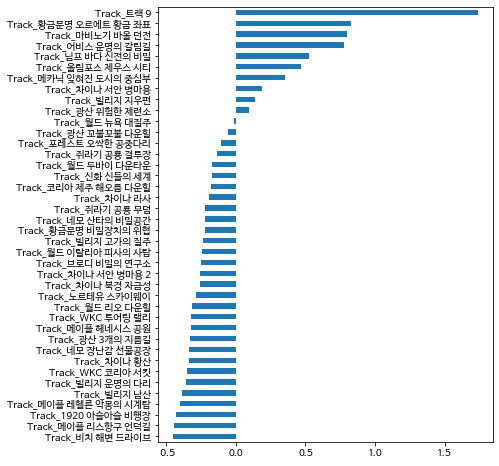

Ridge Regression, alpha=0.1
학습 세트 r2_score : 0.993
검증 세트 r2_score : 0.992
테스트 세트 r2_score : 0.991


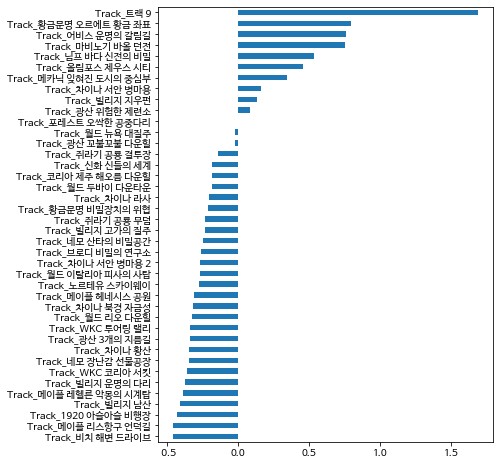

Ridge Regression, alpha=1.0
학습 세트 r2_score : 0.992
검증 세트 r2_score : 0.99
테스트 세트 r2_score : 0.99


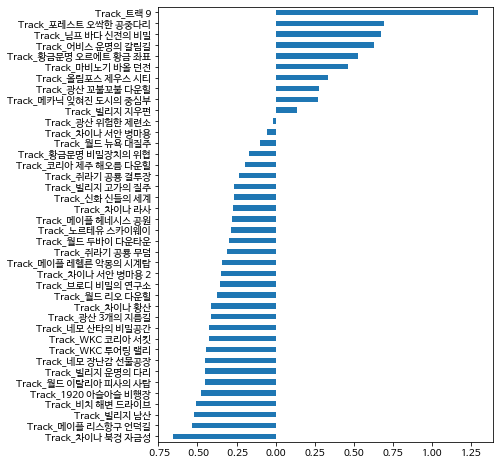

Ridge Regression, alpha=1
학습 세트 r2_score : 0.992
검증 세트 r2_score : 0.99
테스트 세트 r2_score : 0.99


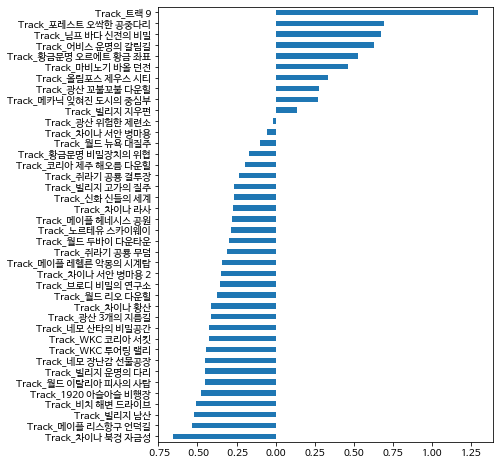

Ridge Regression, alpha=100.0
학습 세트 r2_score : 0.763
검증 세트 r2_score : 0.669
테스트 세트 r2_score : 0.752


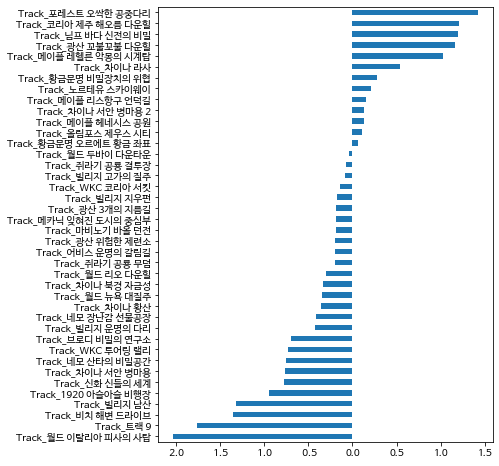

Ridge Regression, alpha=1000.0
학습 세트 r2_score : 0.28
검증 세트 r2_score : 0.219
테스트 세트 r2_score : 0.269


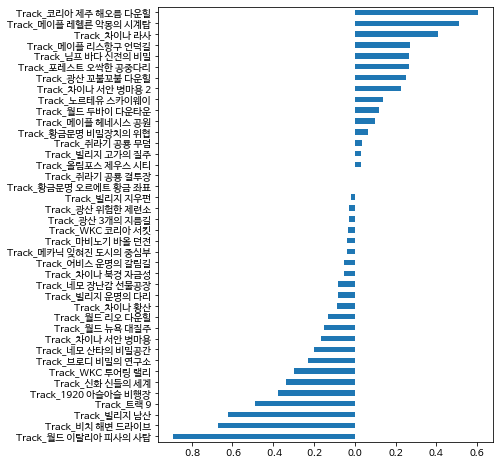

Ridge Regression, alpha=10000.0
학습 세트 r2_score : 0.078
검증 세트 r2_score : 0.057
테스트 세트 r2_score : 0.074


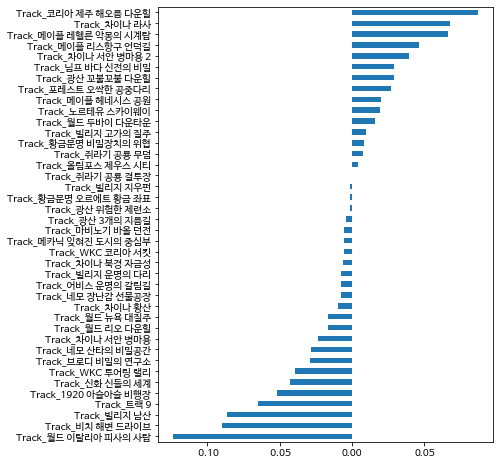

In [28]:
"""
패널티값(alpha)이 커질수록 회귀계수가 작아지는 것을 그래프로 확인해보세요.
"""

for alpha in [0.01, 0.1, 1.0, 1, 100.0, 1000.0, 10000.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    ridge = Ridge(alpha=alpha)  
    ridge.fit(X_train_ohe, y_train)

    # 성능 확인
    print_score(ridge, X_train_ohe, y_train, X_test_ohe, y_test)

    # plot coefficients
    # 절대값 상위 40개의 회귀계수만 그래프에 나타냈습니다. 
    coefficients = pd.Series(ridge.coef_, X_train_ohe.columns)
    idx = np.abs(coefficients).head(40).index
    plt.figure(figsize=(6, 8))
    coefficients[idx].sort_values().plot.barh()
    plt.show()

In [29]:
# ridgecv로 학습
alphas = np.arange(1, 100, 10)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_ohe, y_train)

print("alpha: ", ridge.alpha_)


# 성능 확인
ridge_train, ridge_val, ridge_test = print_score(ridge, X_train_ohe, y_train, X_test_ohe, y_test)

alpha:  1
학습 세트 r2_score : 0.992
검증 세트 r2_score : 0.99
테스트 세트 r2_score : 0.99


In [30]:
ridge_coef = pd.Series(ridge.coef_, ridge.feature_names_in_)
ridge_coef.sort_values(ascending=False).head(20)

Name_EBFD            48.403727
Name_sehbg           47.314701
Name_Cartoon25       43.621178
Name_playercoco      36.404050
Name_BabyHuaZhi      36.223688
Name_하늘나라올라          35.252522
Name_SISAnnaBella    31.959241
Name_디엘미누            29.616960
Name_티코풀악셀           27.165928
Name_티이라최고야          25.951728
Name_Fairy레오         23.153052
Name_sofjoie         21.761016
Name_AsiaMashly      21.350687
Name_초록맥주나무          19.418321
Name_밥값라이더           19.276772
Name_LeMans람지        18.741658
Name_Fairy아들         17.828509
Name_Mudo094         17.191036
Name_비염앓는사람          16.674056
Name_Evolve너만        16.217474
dtype: float64

Lasso Regression, alpha=1e-06
학습 세트 r2_score : 0.993
검증 세트 r2_score : 0.993
테스트 세트 r2_score : 0.992


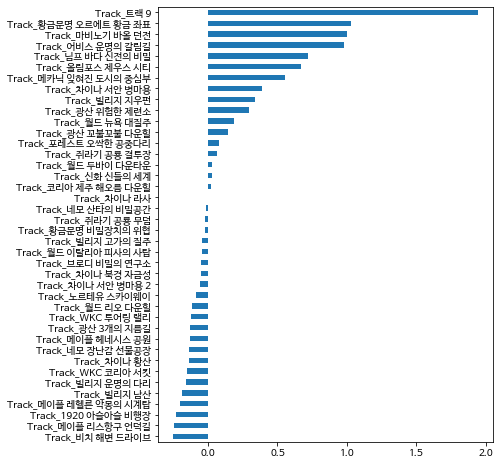

Lasso Regression, alpha=0.001
학습 세트 r2_score : 0.993
검증 세트 r2_score : 0.992
테스트 세트 r2_score : 0.991


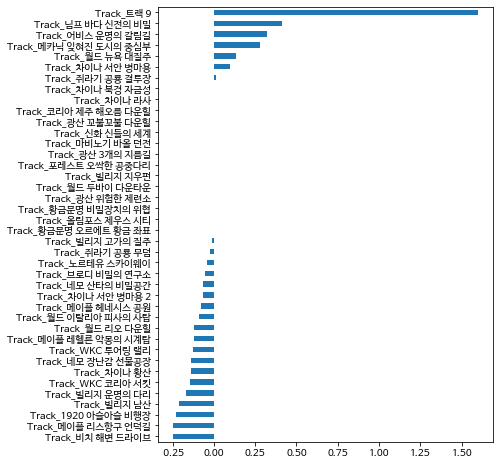

Lasso Regression, alpha=0.01
학습 세트 r2_score : 0.988
검증 세트 r2_score : 0.987
테스트 세트 r2_score : 0.984


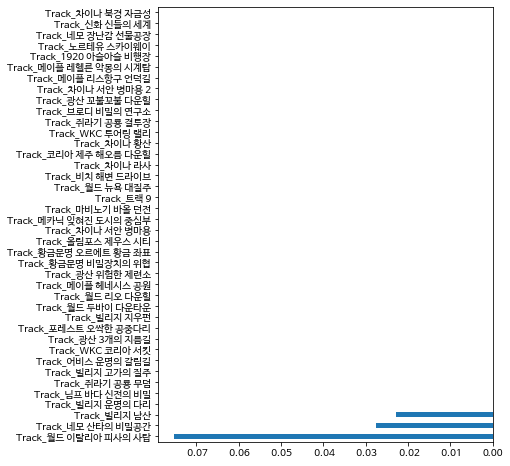

Lasso Regression, alpha=1.0
학습 세트 r2_score : 0.089
검증 세트 r2_score : 0.085
테스트 세트 r2_score : 0.081


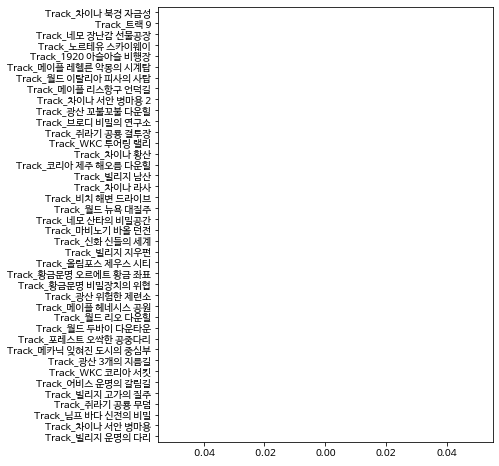

Lasso Regression, alpha=100
학습 세트 r2_score : 0.0
검증 세트 r2_score : -0.002
테스트 세트 r2_score : -0.001


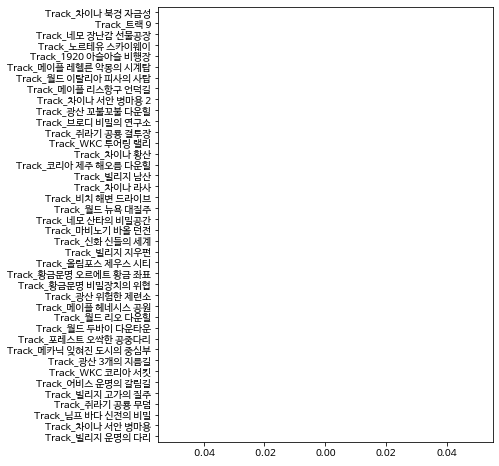

In [31]:
"""
패널티값(alpha)이 커질수록 회귀계수가 작아지는 것을 그래프로 확인해보세요.
"""

for alpha in [0.000001, 0.001, 0.01, 1.0, 100]:
        
    print(f'Lasso Regression, alpha={alpha}')

    # Ridge 모델 학습
    lasso = Lasso(alpha=alpha)  
    lasso.fit(X_train_ohe, y_train)

    # 성능 확인
    print_score(lasso, X_train_ohe, y_train, X_test_ohe, y_test)

    # plot coefficients
    # 절대값 상위 40개의 회귀계수만 그래프에 나타냈습니다. 
    coefficients = pd.Series(lasso.coef_, X_train_ohe.columns)
    idx = np.abs(coefficients).head(40).index
    plt.figure(figsize=(6, 8))
    coefficients[idx].sort_values().plot.barh()
    plt.show()

In [32]:
# lassocv로 학습
alphas = np.arange(10, 200, 10)
lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X_train_ohe, y_train)

print("alpha: ", lasso.alpha_)

# 성능 확인
lasso_train, lasso_val, lasso_test = print_score(lasso, X_train_ohe, y_train, X_test_ohe, y_test)

alpha:  190
학습 세트 r2_score : 0.0
검증 세트 r2_score : -0.002
테스트 세트 r2_score : -0.001


In [33]:
print('회귀계수가 0이 아닌 특성의 수:', (lasso.coef_!=0).sum())
# 총 282개의 특성 중 84개를 제외하고는 모두 회귀계수가 0으로 수렴하였습니다. 

lasso_coef = pd.Series(lasso.coef_, ridge.feature_names_in_)
lasso_coef[lasso_coef!=0].sort_values(ascending=False)

회귀계수가 0이 아닌 특성의 수: 0


Series([], dtype: float64)

왜 나는 라소 알파 올라가면 값이 더 떨어짐?

그리고 이거 자꾸 특성 값 높은거 부터 잡는거 같은데 타임이랑 음의 방향으로 비례해야하는거 아니었나? 이래도 되나?

In [34]:
eval_compare = pd.DataFrame(index = ['train', 'CV', 'Test'], data = {'OLS':[ols_train, ols_val, ols_test], 'Ridge':[ridge_train, ridge_val, ridge_test], 'Lasso':[lasso_train, lasso_val, lasso_test]})
eval_compare

,OLS,Ridge,Lasso
train,9.930000e-01,0.992,0.000
CV,-1.579353e+18,0.990,-0.002
Test,-2.323800e+16,0.990,-0.001


In [35]:
compare = pd.concat([ols_coef, ridge_coef, lasso_coef], axis=1)
compare.columns = ['OLS', 'Ridge', 'Lasso']

In [36]:
idx = np.abs(compare.OLS).head(30).index
compare.loc[idx].sort_values(by='Lasso')

,OLS,Ridge,Lasso
Track_빌리지 운명의 다리,3.658879e+07,-0.450820,-0.0
Track_WKC 코리아 서킷,3.658879e+07,-0.425582,-0.0
Track_어비스 운명의 갈림길,3.658879e+07,0.627279,-0.0
Track_빌리지 고가의 질주,3.658879e+07,-0.265532,0.0
Track_쥐라기 공룡 무덤,3.658879e+07,-0.311587,0.0
Track_님프 바다 신전의 비밀,3.658879e+07,0.673006,0.0
Track_차이나 서안 병마용,3.658879e+07,-0.058666,-0.0
Track_메카닉 잊혀진 도시의 중심부,3.658879e+07,0.267443,-0.0
Track_신화 신들의 세계,3.658879e+07,-0.269728,-0.0
Track_마비노기 바올 던전,3.658879e+07,0.458579,-0.0


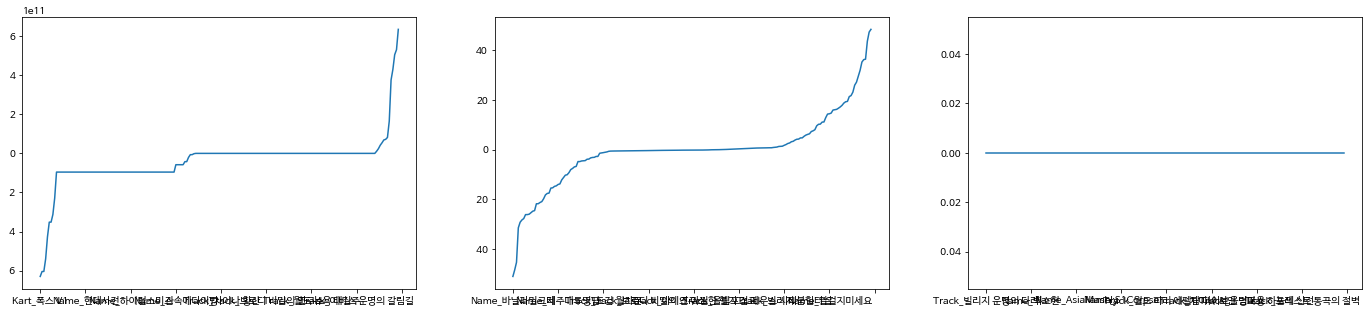

In [37]:
fig = plt.figure(figsize=(24, 5))
ax = fig.add_subplot(131)
compare.OLS.sort_values().plot(ax=ax)

ax1 = fig.add_subplot(132)
compare.Ridge.sort_values().plot(ax=ax1)

ax2 = fig.add_subplot(133)
compare.Lasso.sort_values().plot(ax=ax2)
plt.show()

In [38]:
X_total = pd.concat([X_train_ohe, X_test_ohe])
y_total = pd.concat([y_train, y_test])

In [40]:
alphas = np.arange(10, 200, 10)

ridge_final = RidgeCV(alphas=alphas, cv=5)
ridge_final.fit(X_total, y_total)

ridge_final_coef = ridge_final.coef_


print(f'alpha: {ridge_final.alpha_}')
print(f'cv best score: {ridge_final.score(X_total, y_total)}')

alpha: 10
cv best score: 0.9781226799128707


ridge 회귀계수 최대값 : 37.7000295480793
ridge 회귀계수 평균 : -0.10354535122931852
회귀계수가 0이 아닌 특성의 수 : 199


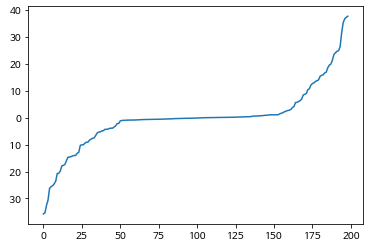

In [41]:
# 회귀계수를 확인해보겠습니다. 
print(f'ridge 회귀계수 최대값 : {ridge_final_coef.max()}\nridge 회귀계수 평균 : {ridge_final_coef.mean()}')
print(f'회귀계수가 0이 아닌 특성의 수 : {(ridge_final_coef!=0).sum()}')
ridge_final_coef.sort()
plt.plot(ridge_final_coef)
plt.show()

근데 이게 도대체 무슨 짓을 한건지도 이젠 잘 모르겠네

기준 모델의 설정이 필요함

아마 선형회귀일테니 타겟의 평균값

능력치의 단순합으로 한 번 계산해볼까
스캐터플롯 한 번 찍어보자고

In [22]:
df['성능합'] = df['드리프트'] + df['가속력'] + df['코너링'] + df['부스터시간'] + df['부스터충전량']

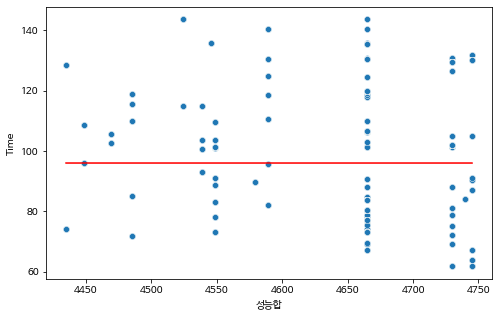

In [23]:
plt.figure(figsize=(8,5))
predict = df['Time'].mean()
sns.lineplot(x=df['성능합'], y=predict, color='red')

sns.scatterplot(x=df['성능합'], y=df['Time'])

plt.show()

딱히 의미없는 형태... 아 그리고 비주얼라이즈 저장안됐더라... 조짐...

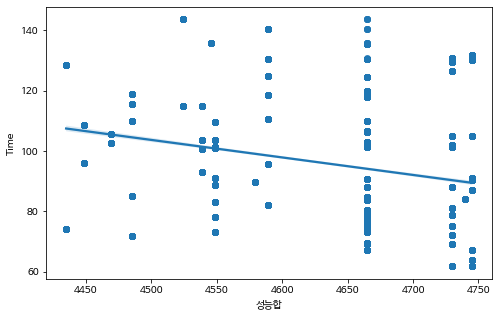

In [24]:
plt.figure(figsize=(8,5))
sns.regplot(x='성능합', y='Time', data=df)

그래도 성능이 오를 수록 내려가는 모습은 보이네 허허...

In [25]:
feature = ['성능합']
target = 'Time'

X = df[feature]
y = df[target]

print(X.shape)
print(y.shape)

(9052, 1)
(9052,)


In [26]:
simple_ols = LinearRegression()
simple_ols.fit(X, y)

LinearRegression()

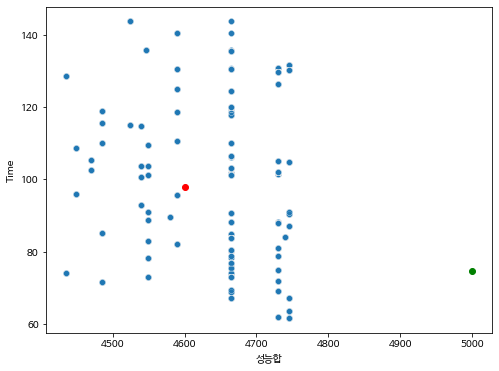

In [27]:
interpolate_x = [[4600]]
interpolate_y = simple_ols.predict(interpolate_x)[0]

extrapolate_x = [[5000]]
extrapolate_y = simple_ols.predict(extrapolate_x)[0]

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['성능합'], y=df['Time'], alpha=0.6)

plt.scatter(interpolate_x, interpolate_y, color='red')
plt.scatter(extrapolate_x, extrapolate_y, color='green')

plt.show()

따로 트랙을 나눠주지 않고 나이브하게 단순선형회귀로 확인했을 때도 감소하는 형태가 나온다는게 좀 신기하긴 하네

In [28]:
features = ['Track', '성능합']
target = 'Time'

X = df[features]
y = df[target]

print(X.shape)
print(y.shape)

(9052, 2)
(9052,)


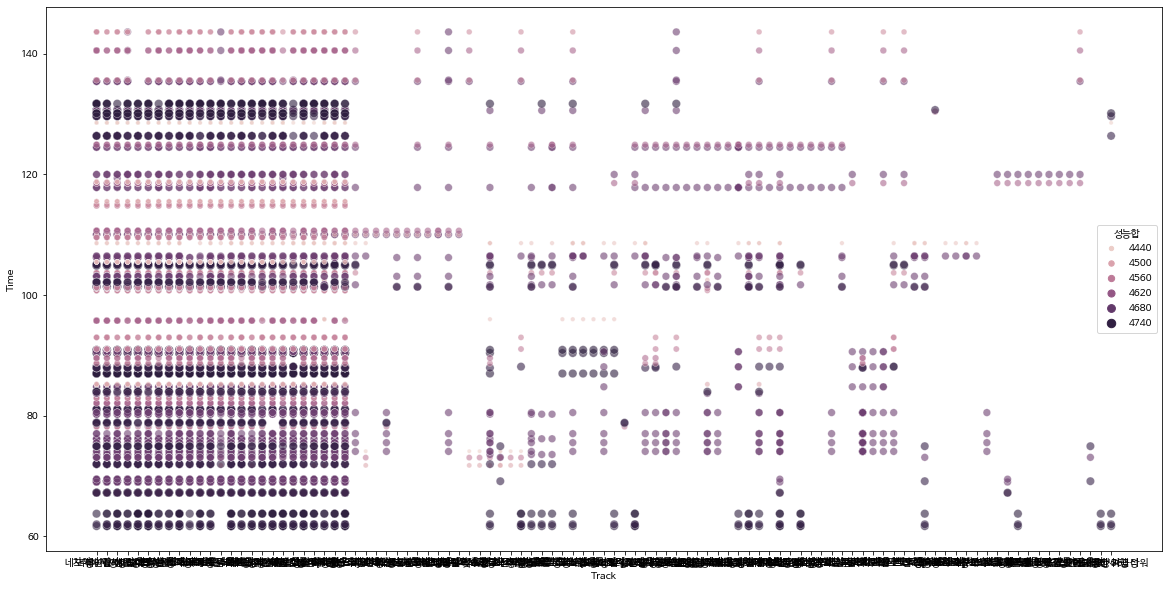

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['Track'], y=df['Time'], hue=df['성능합'], size=df['성능합'], alpha=0.6)
plt.show()

상당히 복잡하게 되어있고, 솔직하게 말해서 성능이 높은 차량이 항상 맨 아래에 있진 않다. 근데 확실히 아래쪽에 비중이 높아 성능이 높은 애들이

트랙 이름이 너무 길어서 플롯이 안예뻐...

In [30]:
# multiple_ols = LinearRegression()
# multiple_ols.fit(X, y)#이거도 결국 맵 때문에 안되네 여기서 인코더를 써야하나보다

In [31]:
print('coefficient :', simple_ols.coef_)
print('intercept :', simple_ols.intercept_)

coefficient : [-0.05806819]
intercept : 364.9645077193361


In [32]:
print(f'선형회귀식 : y = 성능합 * {simple_ols.coef_[0]:.3f} + {simple_ols.intercept_:.3f}')

선형회귀식 : y = 성능합 * -0.058 + 364.965


회귀계수는 성능합이 1 오를 때 마다 평균 기록은 0.058초씩 감소한다.


In [33]:
def explain_prediction(spec):
  y_pred = simple_ols.predict([[spec]])
  pred = f'{spec} 성능합 기록 예측 : {y_pred[0]} (성능합 1증가당 기록 감소 : {simple_ols.coef_[0]:.3f})'
  return pred

In [34]:
print(explain_prediction(4500))

4500 성능합 기록 예측 : 103.65766166795618 (성능합 1증가당 기록 감소 : -0.058)


In [35]:
@interact
def explain_prediction(spec=(4000,5000)):
  y_pred = simple_ols.predict([[spec]])
  pred = f'{spec} 성능합 기록 예측 : {y_pred[0]} (성능합 1증가당 기록 감소 : {simple_ols.coef_[0]:.3f})'
  return pred

interactive(children=(IntSlider(value=4500, description='spec', max=5000, min=4000), Output()), _dom_classes=(…

In [36]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

print(train.shape, val.shape, test.shape)

(5792, 11) (1449, 11) (1811, 11)


In [37]:
num_features = df.dtypes[df.dtypes != 'object'].index
df[num_features].corr()['Time'].sort_values(ascending=False)

Time      1.000000
Rank      0.132766
부스터시간     0.054923
가속력      -0.055326
드리프트     -0.093682
부스터충전량   -0.098321
코너링      -0.161547
성능합      -0.250106
Name: Time, dtype: float64

이거 좀 궁금한게, 성능합이 높을수록 타임은 떨어지거든? 이렇게 음의 방향으로 비례하는 경우에는 상관계수가 높은게 좋은거냐?

해보자 그럼 상관계수 높은거 2개, 낮은 거 2개 뽑아서 각각 학습 시켜 보면 되지

In [38]:
target = 'Time'
h_features = ['Rank', '부스터시간']
l_features = ['성능합', '코너링']

def xy_split(df, features):
  X = df[features]
  y = df[target]
  return X, y

X_train_h, y_train_h = xy_split(train, h_features)
X_val_h, y_val_h = xy_split(val, h_features)
X_test_h, y_test_h = xy_split(test, h_features)

X_train_l, y_train_l = xy_split(train, l_features)
X_val_l, y_val_l = xy_split(val, l_features)
X_test_l, y_test_l = xy_split(test, l_features)

In [39]:
pd.options.display.float_format = '{:,.3f}'.format

def eval_models(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    mae = mean_absolute_error(y_true, y_pred).round(3)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mae, r2

baseline_h = [y_train_h.mean()] * len(y_train_h)
eval_models(baseline_h, y_train_h)

baseline_l = [y_train_l.mean()] * len(y_train_l)
eval_models(baseline_l, y_train_l)

(458.5, 21.413, 18.334, -2.2703825411630804e+30)

In [40]:
model_h = LinearRegression()
model_h.fit(X_train_h, y_train_h)

y_train_h_pred = model_h.predict(X_train_h)
y_val_h_pred = model_h.predict(X_val_h)
y_test_h_pred = model_h.predict(X_test_h)

In [41]:
model_l = LinearRegression()
model_l.fit(X_train_l, y_train_l)

y_train_l_pred = model_l.predict(X_train_l)
y_val_l_pred = model_l.predict(X_val_l)
y_test_l_pred = model_l.predict(X_test_l)

In [42]:
comparison_h = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base', 'Train', 'Validation', 'Test'])
comparison_h['Base'] = eval_models(y_train_h, baseline_h)
comparison_h['Train'] = eval_models(y_train_h, y_train_h_pred)
comparison_h['Validation'] = eval_models(y_val_h, y_val_h_pred)
comparison_h['Test'] = eval_models(y_test_h, y_test_h_pred)

comparison_l = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base', 'Train', 'Validation', 'Test'])
comparison_l['Base'] = eval_models(y_train_l, baseline_l)
comparison_l['Train'] = eval_models(y_train_l, y_train_l_pred)
comparison_l['Validation'] = eval_models(y_val_l, y_val_l_pred)
comparison_l['Test'] = eval_models(y_test_l, y_test_l_pred)

In [43]:
comparison_h

,Base,Train,Validation,Test
mse,458.500,450.091,477.712,428.513
rmse,21.413,21.215,21.857,20.701
mae,18.334,18.251,18.849,17.857
r2,0.000,0.018,0.027,0.014


In [44]:
comparison_l

,Base,Train,Validation,Test
mse,458.500,428.998,454.040,407.200
rmse,21.413,20.712,21.308,20.179
mae,18.334,17.121,17.754,16.641
r2,0.000,0.064,0.075,0.063


다른 오차는 근소하게 로우 피쳐들이 좋지만 r2에서 로우 피쳐가 압도적으로 좋은 모습을 보여준다.

따라서 이렇게 음의 비례를 가지는 경우에는 상관계수가 낮게 나오는 쪽이 오히려 특성간 상관관계가 높다고 볼 수 있겠다.

아 근데 성능합은 그냥 다른 성능들 다 합친거라서 나중에 쓸 때는 성능합은 빼놓고 하던가 해. 저거는 그냥 리니어리그레션 보기만 하려고 넣은거니까 아마 과적합 날거 같아

부스터 지속시간이 상관계수가 낮은 건 의외긴 해

데이터가 1만개... 크로스 밸리데이션 한 번 써보지 뭐

In [45]:
for i in range(1,30, 5) :
    train_sk, val_sk = train_test_split(train, test_size=0.25, random_state=i)
    X_train, y_train = xy_split(train_sk, l_features)
    X_val, y_val = xy_split(val_sk, l_features)

    model_l.fit(X_train, y_train)

    y_train_pred = model_l.predict(X_train)
    y_val_pred = model_l.predict(X_val)

    print(f'train result of random_state {i}:',mean_absolute_error(y_train, y_train_pred).round(2))
    print(f'validation result of random_state {i}:',mean_absolute_error(y_val, y_val_pred).round(2))
    print('---------------------------------------------------------------')

train result of random_state 1: 17.16
validation result of random_state 1: 17.01
---------------------------------------------------------------
train result of random_state 6: 17.24
validation result of random_state 6: 16.84
---------------------------------------------------------------
train result of random_state 11: 17.18
validation result of random_state 11: 16.95
---------------------------------------------------------------
train result of random_state 16: 17.47
validation result of random_state 16: 16.35
---------------------------------------------------------------
train result of random_state 21: 17.16
validation result of random_state 21: 17.09
---------------------------------------------------------------
train result of random_state 26: 17.22
validation result of random_state 26: 16.81
---------------------------------------------------------------


In [46]:
kf = KFold(n_splits=5)
print('k =', kf.get_n_splits())

cv_result = []
for train_idx, test_idx in kf.split(X_train_l) :
    X_train_cv, X_val_cv = X_train_l.iloc[train_idx], X_train_l.iloc[test_idx]
    y_train_cv, y_val_cv = y_train_l.iloc[train_idx], y_train_l.iloc[test_idx]

    # 위에서 선언한 linear regression
    model_l.fit(X_train_cv, y_train_cv)

    # 모델 예측
    y_pred_cv = model_l.predict(X_val_cv)

    # mae를 구해보겠습니다.
    mae_cv = mean_absolute_error(y_val_cv, y_pred_cv).round(2)
    cv_result.append(mae_cv)

print('mae for each fold : ', cv_result)
print('average mae for model : ', np.mean(cv_result).round(2))
print('std of result : ', np.std(cv_result).round(2))

k = 5
mae for each fold :  [17.04, 16.99, 16.99, 17.08, 17.55]
average mae for model :  17.13
std of result :  0.21


이게 크로스 밸 스코어가 kfold를 안써도 아 그건 아니네

In [47]:
cv_results = cross_val_score(
    model_l, 
    X_train_cv, 
    y_train_cv, 
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
    )


print('mae for each fold : ', -np.round(cv_results, 2))
print('average mae for model : ', -np.mean(cv_results).round(2))
print('std of result : ', np.std(cv_results).round(2))

mae for each fold :  [17.19 16.8  17.09 16.52 17.35]
average mae for model :  16.99
std of result :  0.3


과적합 방지용 드랍 칼럼 : Match_Id, Name

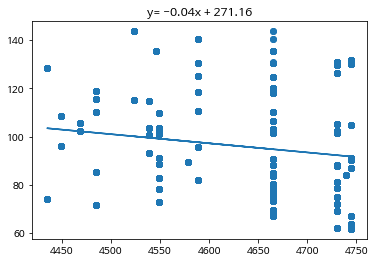

In [48]:
ridge = Ridge(alpha=0.5, normalize=True)
ridge.fit(X_train_l[['성능합']], y_train_l)
y_pred_ridge = ridge.predict(X_train_l[['성능합']])

plt.scatter(X_train_l['성능합'], y_train_l)
plt.plot(X_train_l['성능합'], y_pred_ridge)
plt.title(f'y= {ridge.coef_[0].round(2)}x + {ridge.intercept_.round(2)}')

plt.show()

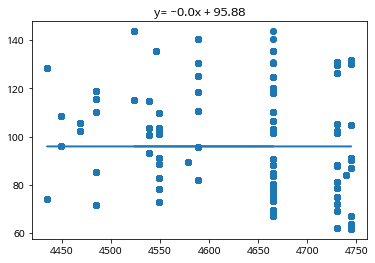

In [49]:
lasso = Lasso(alpha=0.5, normalize=True)
lasso.fit(X_train_l[['성능합']], y_train_l)
y_pred_ridge = lasso.predict(X_train_l[['성능합']])

plt.scatter(X_train_l['성능합'], y_train_l)
plt.plot(X_train_l['성능합'], y_pred_ridge)
plt.title(f'y= {lasso.coef_[0].round(2)}x + {lasso.intercept_.round(2)}')

plt.show()

라소가 영향력이 안큰 회귀계수를 0으로 만들어서 이게 모조리 이런식으로 나오는 건가... 일단 이거는 테스트용으로 피쳐를 두 개만 넣어놓은거라서 나중에 한 번 전체적으로 손을 좀 보자고

In [50]:
# 그래프를 그리기 위한 함수
def predict_ypred(alpha, model) : 
    ml = model(alpha=alpha, normalize=True)
    ml.fit(X_train_l[['성능합']], y_train_l)
    m = ml.coef_[0].round(2)
    b = ml.intercept_.round(2)
    formula = f'y = {m}x + {b}'
    X_train_l['y_pred'] = ml.predict(X_train_l[['성능합']])
    return X_train_l['y_pred'], formula


def plotting(model, alphas, ax, title, legend) :
    colors = ['blue', 'red','orange', 'green']
    for alpha, color in zip(alphas, colors):
        X_train_l['y_pred'], formula = predict_ypred(alpha, model)
        X_train_l.plot('성능합', 'y_pred', ax=ax, color =color, linestyle='dashed', alpha=0.5)
        ax.text(132, X_train_l.loc[27, 'y_pred'], formula)
    ax.set_title(title)
    ax.legend(legend)

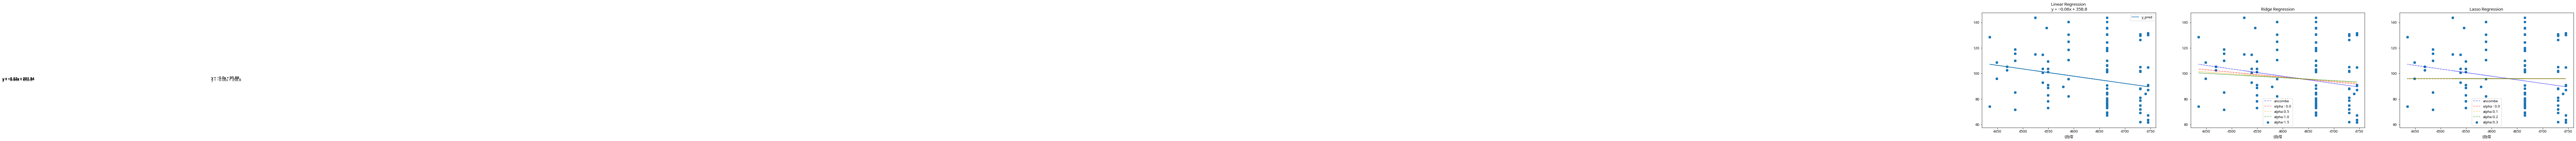

In [51]:
%matplotlib inline

fig = plt.figure(figsize=(30, 6))
ax = fig.add_subplot(131)
ax.scatter(X_train_l['성능합'], y_train_l)

"""
OLS
"""
ols = LinearRegression()
ols.fit(X_train_l[['성능합']], y_train_l)

# 회귀계수와 intercept를 확인합니다.
m = ols.coef_[0].round(2)
b = ols.intercept_.round(2)
title = f'Linear Regression \n y = {m}x + {b}'

# 훈련 데이터로 예측을 합니다.
X_train_l['y_pred'] = ols.predict(X_train_l[['성능합']])
X_train_l.plot('성능합', 'y_pred', ax=ax, title=title);

"""
Ridge Regression
"""
ax1 = fig.add_subplot(132)
ax1.scatter(X_train_l['성능합'], y_train_l)

alphas = np.arange(0, 2, 0.5)
title = 'Ridge Regression'
legend = ['ancombe','alpha : 0.0', 'alpha:0.5', 'alpha:1.0', 'alpha:1.5']
plotting(Ridge, alphas, ax1, title, legend)

"""
Lasso Regression
"""
ax2 = fig.add_subplot(133)
ax2.scatter(X_train_l['성능합'], y_train_l)

alphas = np.arange(0, 0.4, 0.1)
title = 'Lasso Regression'
legend = ['ancombe','alpha : 0.0', 'alpha:0.1', 'alpha:0.2', 'alpha:0.3']
plotting(Lasso, alphas, ax2, title, legend)

plt.show()